### 🔹 `from sklearn.datasets import load_wine`
- Loads the **Wine Dataset**, a well-known multivariate dataset.
- It includes chemical analysis of wines derived from three different cultivars.
- Used here as input data for clustering.


In [20]:
from sklearn.datasets import load_wine

data = load_wine()
X = data.data

### 🔹 `from scipy.cluster.hierarchy import dendrogram, linkage`
- **`linkage`**: Performs hierarchical/agglomerative clustering and returns a linkage matrix.
- **`dendrogram`**: Plots the linkage matrix as a tree diagram to visualize how clusters are merged step by step.
 
---

### 🔹 `import matplotlib.pyplot as plt`
- Used for **visualizing dendrograms** and other plots.
- `plt.figure()` creates a new plot canvas.
- `plt.axhline()` can be used to show the cluster cut threshold.

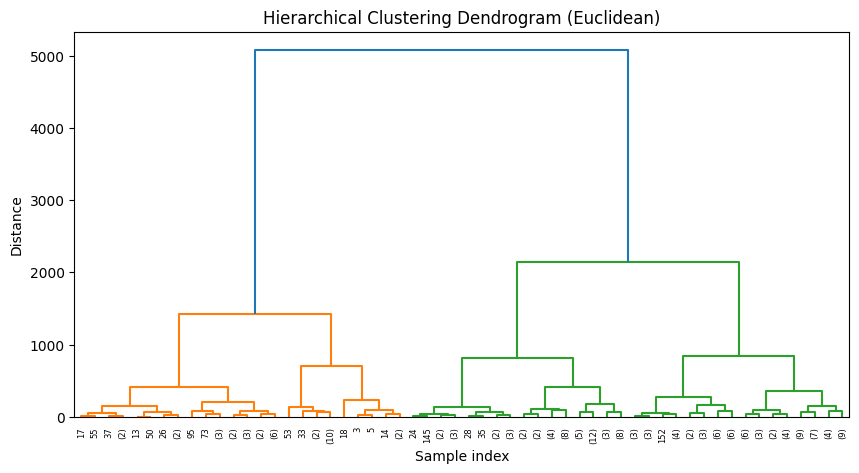

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 5))
Z_euclidean = linkage(X, method='ward')  # ward uses Euclidean by default
dendrogram(Z_euclidean, truncate_mode='level', p=5)

plt.title("Hierarchical Clustering Dendrogram (Euclidean)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


### 🔹 `scipy.spatial.distance.pdist`
- Computes pairwise distances between observations in `X`.
- Supports multiple distance metrics:
  - `'euclidean'`
  - `'cityblock'` (Manhattan)
  - `'cosine'`, etc.
- Output is a condensed distance matrix used in `linkage`.


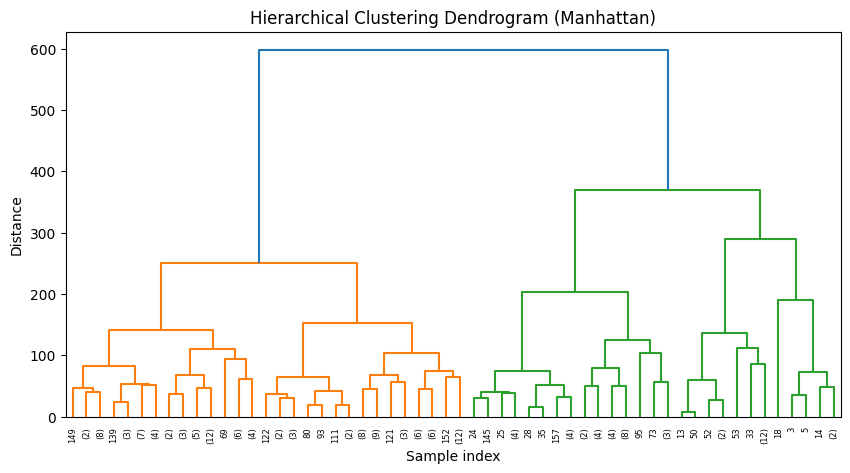

In [22]:
from scipy.spatial.distance import pdist

plt.figure(figsize=(10, 5))
dist_manhattan = pdist(X, metric='cityblock')
Z_manhattan = linkage(dist_manhattan, method='average')  # method can be 'average', 'complete', etc.
dendrogram(Z_manhattan, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Manhattan)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


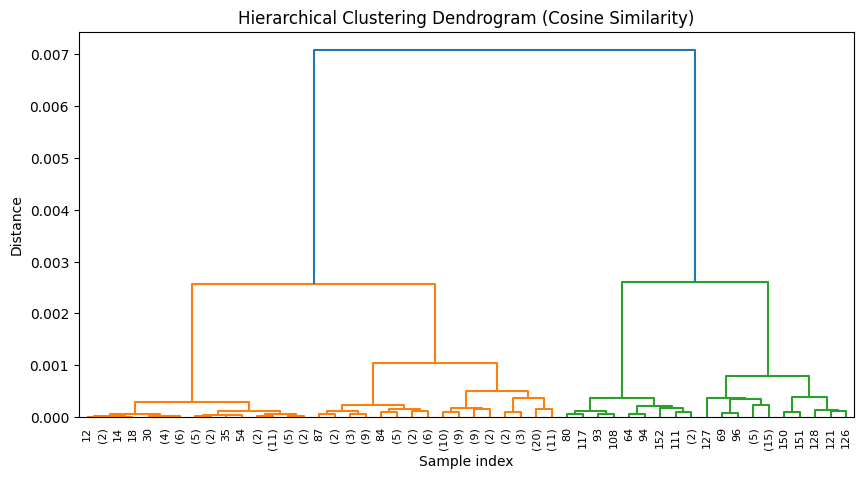

In [23]:

plt.figure(figsize=(10, 5))
dist_cosine = pdist(X, metric='cosine')
Z_cosine = linkage(dist_cosine, method='average')
dendrogram(Z_cosine, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Cosine Similarity)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

## 📌 Bonus: Custom Clustering Example from Medium Blog

This example demonstrates how to perform **hierarchical clustering** on a small dataset of student marks using `scipy`.

### Steps Covered:
1. Define a simple 1D dataset of student marks.
2. Compute the **proximity matrix** using Euclidean distance.
3. Generate the **linkage matrix** using Ward’s method.
4. Plot the **dendrogram** to visualize the clustering.

By default, hierarchical clustering uses **average or centroid-based linkage**, depending on the method. In this case, Ward’s method minimizes the total within-cluster variance.

Note: The example shown here does not use the "maximum value as cluster representative" logic mentioned earlier — this is the standard implementation.




Proximity (Distance) Matrix:
           Student 1  Student 2  Student 3  Student 4  Student 5
Student 1        0.0        3.0       18.0       10.0       25.0
Student 2        3.0        0.0       21.0       13.0       28.0
Student 3       18.0       21.0        0.0        8.0        7.0
Student 4       10.0       13.0        8.0        0.0       15.0
Student 5       25.0       28.0        7.0       15.0        0.0

 Linkage Matrix:
   Cluster 1  Cluster 2   Distance  Sample Count
0        0.0        1.0   3.000000           2.0
1        2.0        4.0   7.000000           2.0
2        3.0        5.0  13.279056           3.0
3        6.0        7.0  29.692872           5.0


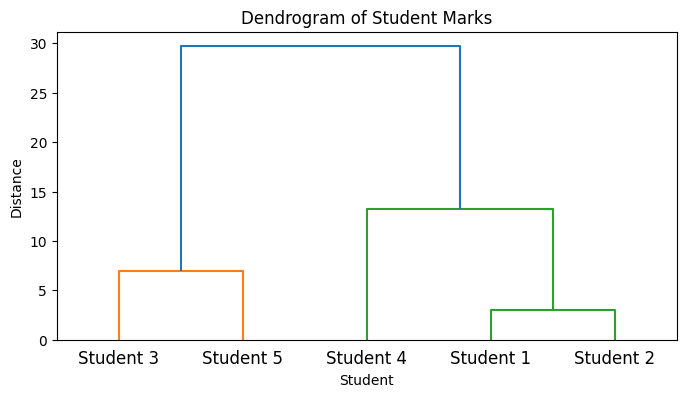

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

marks = np.array([[10], [7], [28], [20], [35]])  #


proximity = pdist(marks, metric='euclidean')
proximity_matrix = squareform(proximity)  


linkage_matrix = linkage(marks, method='ward')  


print("Proximity (Distance) Matrix:")
print(pd.DataFrame(proximity_matrix, 
                   columns=[f"Student {i+1}" for i in range(5)],
                   index=[f"Student {i+1}" for i in range(5)]))

print("\n Linkage Matrix:")
print(pd.DataFrame(linkage_matrix, 
                   columns=["Cluster 1", "Cluster 2", "Distance", "Sample Count"]))


plt.figure(figsize=(8, 4))
dendrogram(linkage_matrix, labels=[f"Student {i+1}" for i in range(5)])
plt.title("Dendrogram of Student Marks")
plt.xlabel("Student")
plt.ylabel("Distance")
plt.show()
